 # Exploratory Data Analysis of Immigration trends in Canada # 

![](https://www.google.com/imgres?imgurl=http%3A%2F%2Fmyrightsimmigration.com%2Fwp-content%2Fuploads%2F2016%2F10%2FImmigration-Words.jpg&imgrefurl=http%3A%2F%2Fmyrightsimmigration.com%2Fimmigration%2F&docid=a7YgqAFJexowTM&tbnid=GFF4fMI5j8gs3M%3A&vet=10ahUKEwj9zNWg-vbhAhUX3o8KHQNoDUYQMwi8AShEMEQ..i&w=1000&h=667&bih=688&biw=1280&q=immigration&ved=0ahUKEwj9zNWg-vbhAhUX3o8KHQNoDUYQMwi8AShEMEQ&iact=mrc&uact=8)

![Image of immigration](https://www.getgcms.com/blog/wp-content/uploads/2017/09/Immigration-pic.jpg)

The dataset we are going use is the dataset of immigration to Canada from 1980 to 2013.

Data Source: [Immigration to Canada from 1980 to 2013](https://dl.dropboxusercontent.com/s/g4vq60q2v2h4hvu/Canada.xlsx)

In [139]:
#import required modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_can = pd.read_excel('https://dl.dropboxusercontent.com/s/g4vq60q2v2h4hvu/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [5]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


### Before starting our analysis let's do some preprocessing to our dataset.

In [6]:
df_can.drop(['Type','Coverage', 'AREA', 'REG','DEV'], axis=1, inplace=True)

In [7]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

In [8]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
df_can.set_index('Country', inplace=True)

In [11]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [12]:
df_can['Total']=df_can.sum(axis=1)

In [14]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


***

### First start by analysing immigration from Haiti

In [19]:
df_can.columns=list(map(str,df_can.columns))

In [50]:
years=[str(x) for x in range(1980,2014)]

In [81]:
haiti=df_can.loc['Haiti', years ]

In [80]:
haiti.index=haiti.index.map(int)

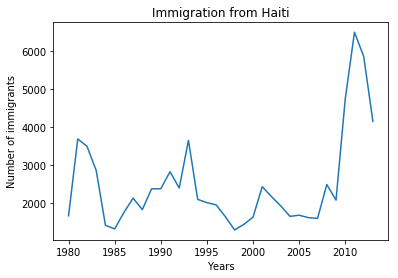

In [65]:
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

We can observe a sudden spike in number of immigrats from Haiti in 2010, as Haiti got hit by an earthquake on 12th Jan. 2010 and Canada stepped up its efforts to accept refugee from Haiti. Let's put this info in our figure: 

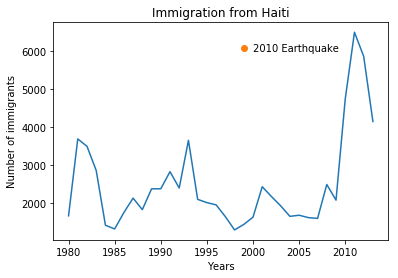

In [72]:
haiti.plot(kind='line')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.title('Immigration from Haiti')


# annotate the 2010 Earthquake
plt.text(2000,6000,'2010 Earthquake')
plt.plot(1999,6100,'o')


___


### Let's compare the number of immigrants from India and China from 1980 to 2013.

In [82]:
df = df_can.loc[['India','China'], years]

In [95]:
df.index = df.index.map(int)

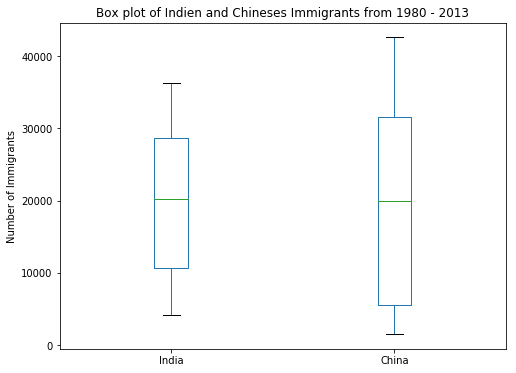

In [144]:
df_CI = df_can.loc[['India','China'], years].transpose()
 
df_CI.plot(kind='box', figsize=(8, 6))
 
plt.title('Box plot of Indien and Chineses Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
 
plt.show()

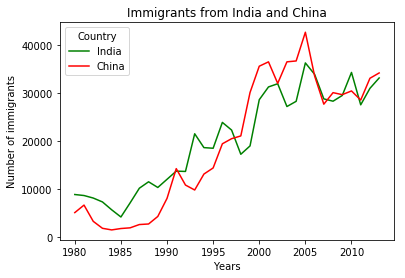

In [98]:
df.plot(kind='line',color=['green','red'])
plt.title('Immigrants from India and China')
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.show()

From the above figure we can say that India and China both have almost similat immigration trends to canada throughout the years.

___

### Comparing the top 5 countries that contributed the most to immigration to Canada :

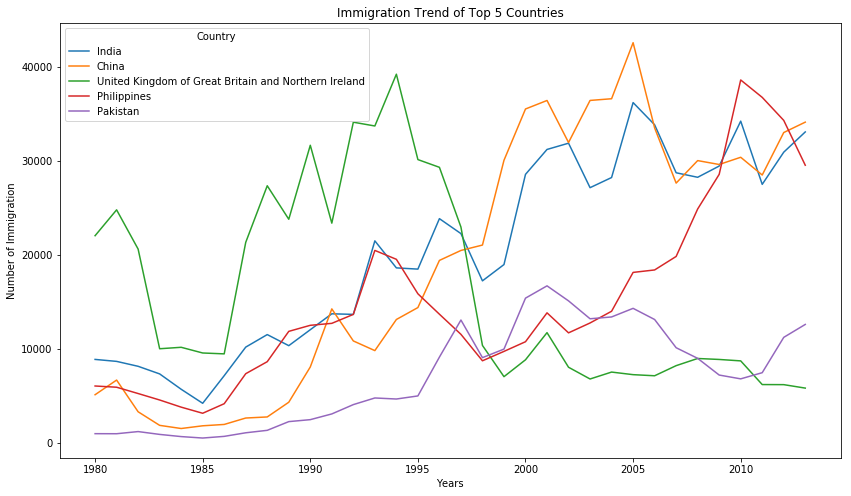

In [119]:
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df_can.head(5)
df_top5 = df_top5[years].transpose()
  
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(14,8))
 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigration')
plt.xlabel('Years')
plt.show()

#### we can visualize this plot as a cumulative plot, also know as a Stacked Line Plot or Area Plot. 

In [120]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
 
# get the top 5 entries
df_top5 = df_can.head()
 
# transpose the dataframe
df_top5 = df_top5[years].transpose() 

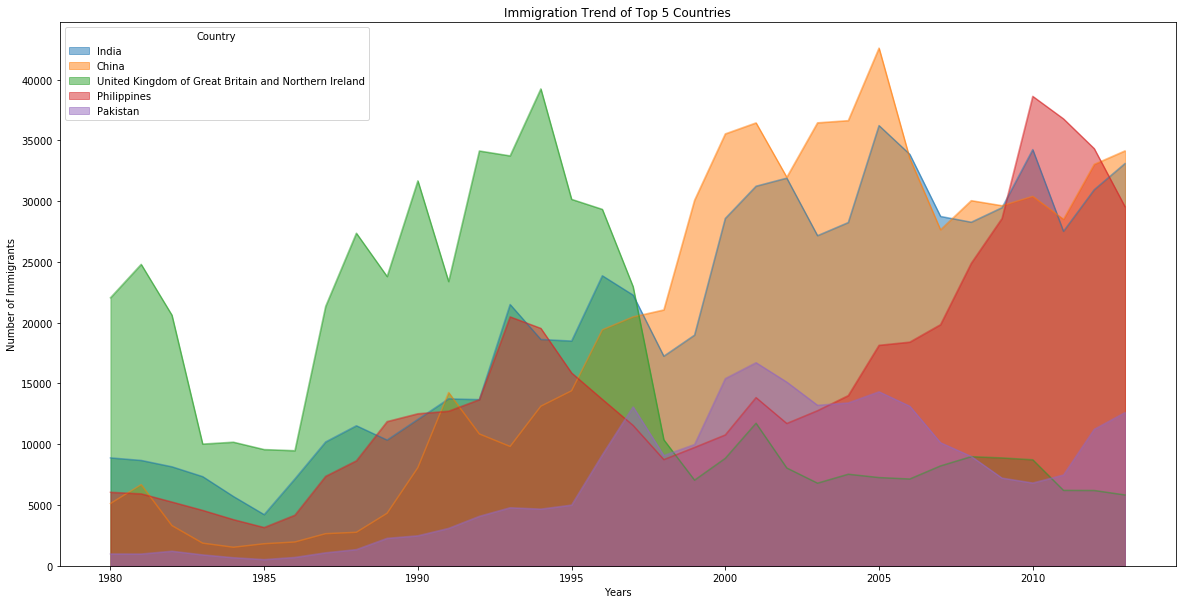

In [121]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )
 
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
 
plt.show()

___

### Compare the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. (Stacked View)

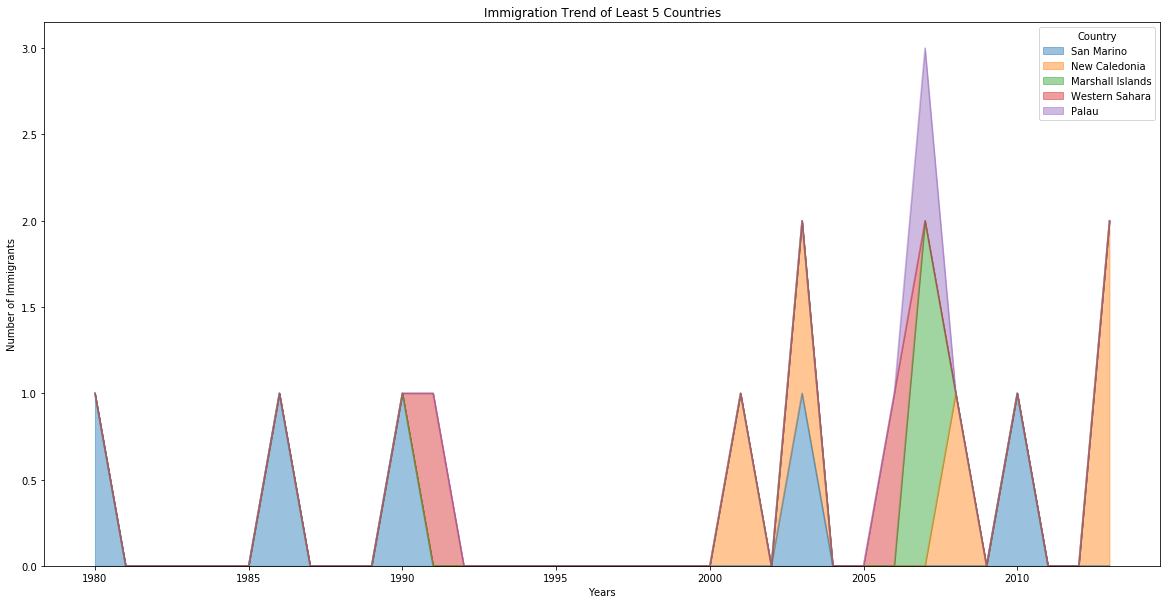

In [122]:
# get the least 5 entries
df_least5 = df_can.tail()
 
# transpose the dataframe
df_least5 = df_least5[years].transpose() 
 
df_least5.head()
 
df_least5.index = df_least5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_least5.plot(kind='area',
              alpha=0.45,
             figsize=(20, 10), # pass a tuple (x, y) size
             )
 
plt.title('Immigration Trend of Least 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
 
plt.show()

#### Plotting the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. (Unstacked View)

Text(0.5,0,'Years')

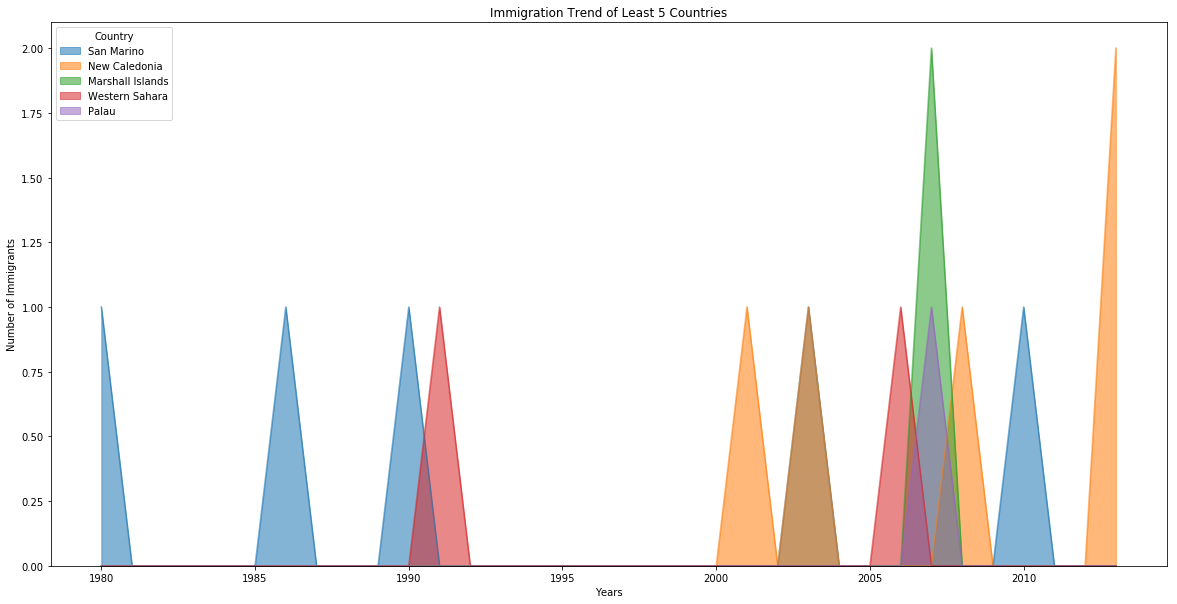

In [123]:
ax1 = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
 
ax1.set_title('Immigration Trend of Least 5 Countries')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

___

### Q: What is the frequency distribution of the number of new immigrants from the various contries to Canada in 2013?

In [124]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])
 
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[     0.    3412.9   6825.8  10238.7  13651.6  17064.5  20477.4  23890.3
  27303.2  30716.1  34129. ]


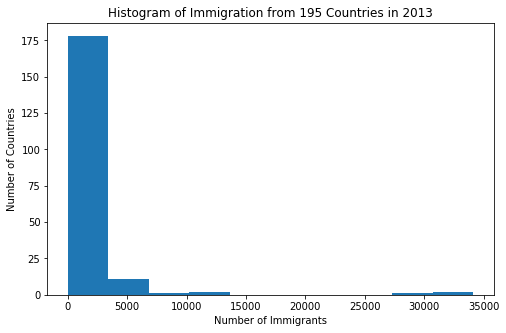

In [125]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))
 
plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label
 
plt.show()

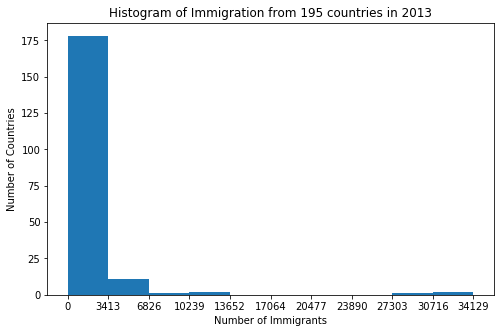

In [126]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])
 
df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
 
plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label
 
plt.show()

___

### Q: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 – 2013?

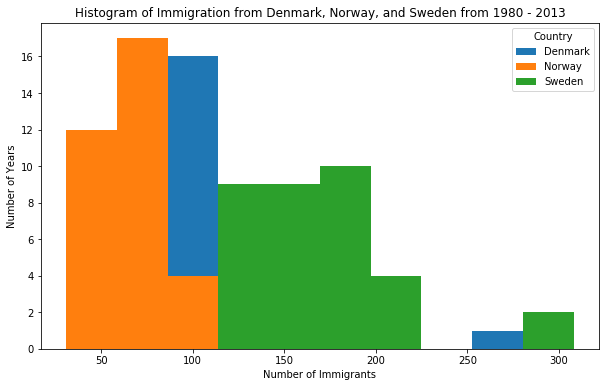

In [127]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
 
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))
 
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
 
plt.show()

Let's refine this figure a bit:

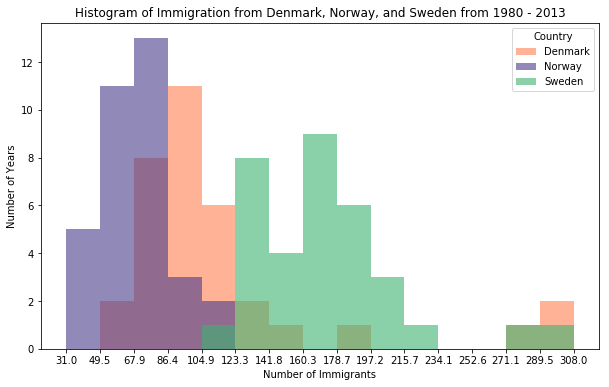

In [128]:

# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)
 
# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )
 
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
 
plt.show()

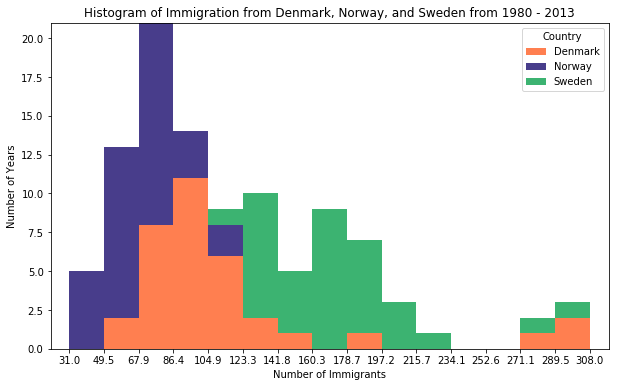

In [129]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes
 
# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )
 
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 
 
plt.show()
 

___

### Q: Let’s compare the number of Icelandic immigrants (country = ‘iceland’) to Canada from year 1980 to 2013.

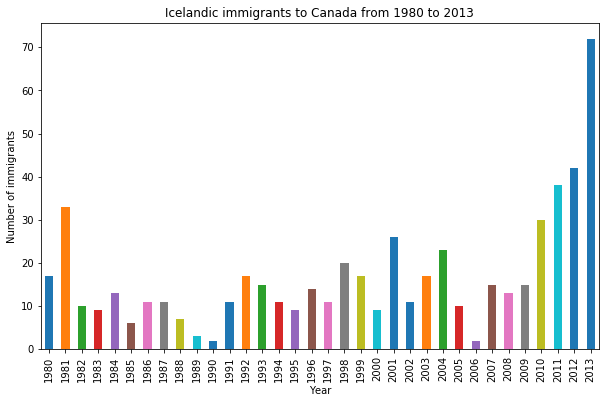

In [130]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))
 
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot
 
plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's put this financial crisis information in our figure:

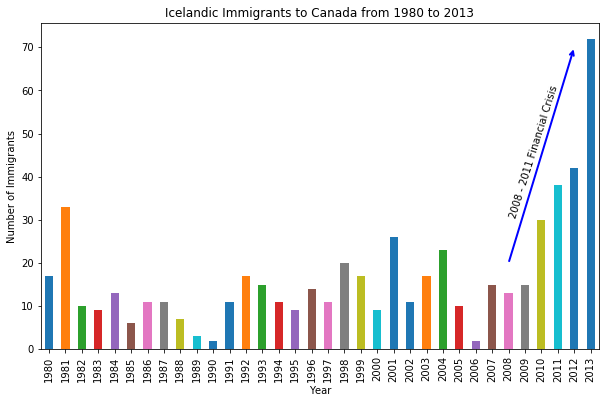

In [131]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 
 
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
 
# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )
 
# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
 
plt.show()

___

### Let's explore the proportion of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [132]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

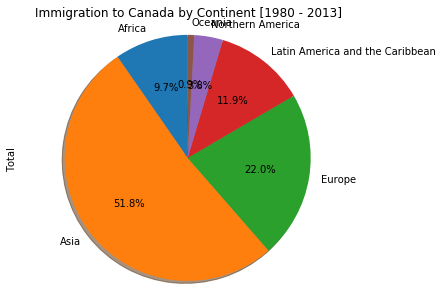

In [133]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(6, 5),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )
 
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
 
plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let’s make a few modifications to improve the visuals : (Exploding the pie chart to emphasize the lowest three continents Africa, North America, and Latin America and Carribbean)

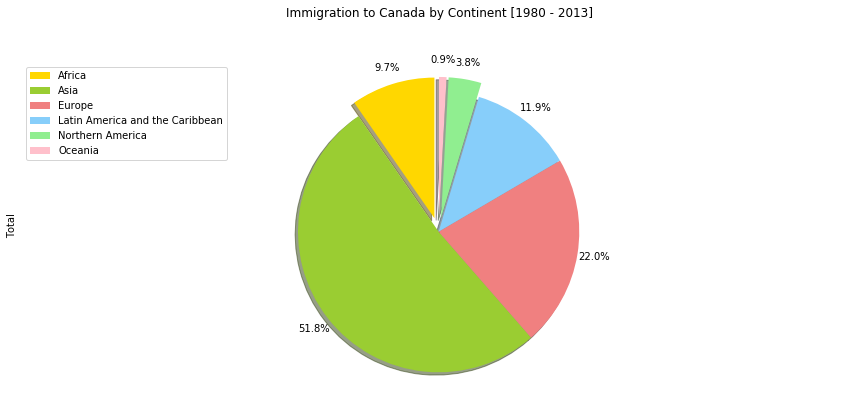

In [134]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.
 
df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )
 
# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
 
plt.axis('equal') 
 
# add legend
plt.legend(labels=df_continents.index, loc='upper left') 
 
plt.show()

___

__________

## Let’s analyze the effect of Argentina’s great depression And compare Argentina’s immigration to that of it’s neighbour Brazil.

Argentina suffered a great depression from 1998 – 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country’s foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.
Let’s analyze the effect of this crisis, and compare Argentina’s immigration to that of it’s neighbour Brazil.

In [136]:
df_can_t = df_can[years].transpose() # transposed dataframe
 
# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)
 
# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'
 
# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)


In [137]:
 
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())
 
# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

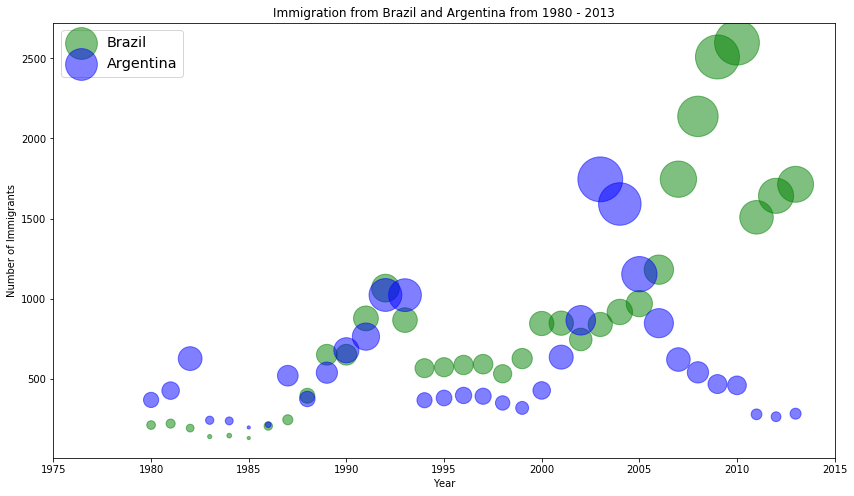

In [138]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )
 
# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )
 
ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 – 2013 data. The larger the bubble, the more immigrants in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 – 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 – 1990, just before the onset of 1998 – 2002 great depression.

On a similar note, Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.

___

### Finally let's analyse the total immigration trend to Canada 

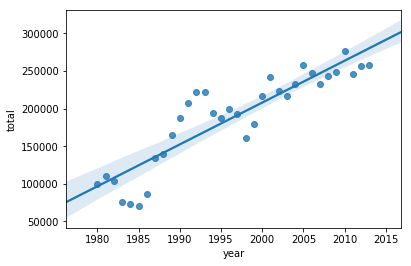

In [140]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
 
# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)
 
# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)
 
# rename columns
df_tot.columns = ['year', 'total']
 
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

Text(0.5,1,'Total Immigration to Canada from 1980 - 2013')

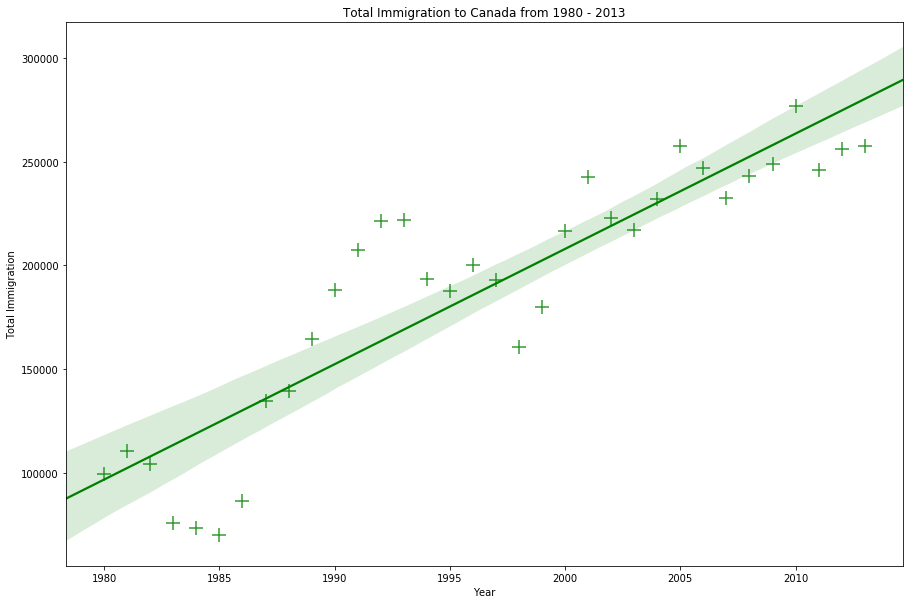

In [141]:

plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
 
ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title